# 4.1 数据分组

## 4.1.1 GroupBy
**分组的本质是根据键将数据拆分成小数据集**

![GroupBy](https://github.com/JacobWongUED/DataScience-100-Days/blob/master/01_%E5%88%A9%E7%94%A8Python%E8%BF%9B%E8%A1%8C%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90/img/GroupBy.jpg?raw=true)

**分组键**  
1. 列表或数组，其长度与待分组的轴一样
2. 表示DatFrame某个列名的值
3. 字典或Series，给出待分组轴上的值与分组名之间的对应关系
4. 函数，用于处理轴索引或索引中的哥哥标签

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import random, array

In [2]:
df = DataFrame(data={
    'key1': list('aabba'),
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': random.randn(5),
    'data2': random.randn(5)
})
df

,key1,key2,data1,data2
0,a,one,0.432257,0.480742
1,a,two,-1.097538,-1.949816
2,b,one,-2.175804,-0.801229
3,b,two,0.672651,1.601269
4,a,one,-0.534944,-1.421358


In [3]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.400075,-0.963477
b,-0.751576,0.400020


In [9]:
df.groupby(['key1', 'key2'])['data1'].mean()

key1  key2
a     one    -0.051344
      two    -1.097538
b     one    -2.175804
      two     0.672651
Name: data1, dtype: float64

In [11]:
df

,key1,key2,data1,data2
0,a,one,0.432257,0.480742
1,a,two,-1.097538,-1.949816
2,b,one,-2.175804,-0.801229
3,b,two,0.672651,1.601269
4,a,one,-0.534944,-1.421358


In [17]:
df[['data1', 'data2']].groupby([df['key1'], df['key2']]).mean()

data1     data2
key1 key2                    
a    one  -0.051344 -0.470308
     two  -1.097538 -1.949816
b    one  -2.175804 -0.801229
     two   0.672651  1.601269

In [ ]:
df.groupby(['key1', 'key2'])['data1'].size()

In [ ]:
df.groupby([df['key1'], df['key2']])['data1'].mean()

In [ ]:
states = array(['Ohio', 'Ohio', 'California', 'California', 'Ohio'])
years = array([2005, 2006, 2005, 2006, 2005])

df.groupby([states, years])['data1'].mean()

**总结**

## 4.1.2 对分组进行迭代

In [ ]:
for key, group in df.groupby('key1'):
    print(key)
    print(group)

In [ ]:
for (key1, key2), group in df.groupby(['key1', 'key2']):
    print(key1, key2)
    print(group)

In [ ]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

In [ ]:
pieces = dict(list(df.groupby(['key1', 'key2'])))
pieces[('a', 'two')]

In [ ]:
grouped = df.groupby(df.dtypes, axis=1)
pieces = dict(list(grouped))
pieces.keys()

## 4.1.3 通过字典或Series进行分组

In [18]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import arange, random

**字典**

In [39]:
people = DataFrame(data=random.randn(5, 5), index=['Joe', 'Steve', 'Wes', 'Max', 'Luis'], columns=list("abcde"))
people.iloc[2:3, [1, 2]] = np.nan
people

,a,b,c,d,e
Joe,-1.277404,-0.083769,1.091497,-0.708795,0.504170
Steve,0.039211,-1.982698,1.569540,0.397934,1.696014
Wes,0.864791,NaN,NaN,0.138995,-0.745040
Max,-0.549086,-0.809052,0.662514,-0.072897,-1.191113
Luis,0.081549,-1.539713,0.561032,0.958584,0.228918


In [47]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [48]:
by_column = people.groupby(mapping, axis=1)
for key, pieace in by_column:
    print(key)
    print(pieace)

blue
              c         d
Joe    1.091497 -0.708795
Steve  1.569540  0.397934
Wes         NaN  0.138995
Max    0.662514 -0.072897
Luis   0.561032  0.958584
red
              a         b         e
Joe   -1.277404 -0.083769  0.504170
Steve  0.039211 -1.982698  1.696014
Wes    0.864791       NaN -0.745040
Max   -0.549086 -0.809052 -1.191113
Luis   0.081549 -1.539713  0.228918


In [49]:
by_column.sum()

,blue,red
Joe,0.382702,-0.857002
Steve,1.967474,-0.247474
Wes,0.138995,0.119751
Max,0.589617,-2.549251
Luis,1.519616,-1.229246


**Series**

In [50]:
ser = Series(mapping)

In [53]:
by_column = people.groupby(mapping, axis=1)
by_column.count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Max,2,3
Luis,2,3


## 4.1.4 利用函数进行分组

In [54]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import random, arange

In [60]:
people = DataFrame(data=random.randint(30, 100, (5, 5)), index=['Max', 'Han', 'Luis', 'Tom', 'Jack'], columns=[1002, 1001, 2003, 2002, 5001])
people

,1002,1001,2003,2002,5001
Max,75,44,91,42,75
Han,52,52,80,41,47
Luis,67,64,33,98,49
Tom,42,69,56,68,40
Jack,35,98,32,49,54


In [61]:
def course(x):
    if 1000 <= x and x <= 1100:
        return 'English'
    elif 2000 <= x and x <=2100:
        return 'Math'
    elif 3000 <= x and x <= 3100:
        return 'Physics'
    elif 4000 <= x and x <= 4100:
        return 'History'
    elif 5000 <= x and x <= 5100:
        return 'Politics'

In [70]:
grouped = people.groupby(course, axis=1)
for key, piece in grouped:
    print(key)
    print(piece)

English
      1002  1001
Max     75    44
Han     52    52
Luis    67    64
Tom     42    69
Jack    35    98
Math
      2003  2002
Max     91    42
Han     80    41
Luis    33    98
Tom     56    68
Jack    32    49
Politics
      5001
Max     75
Han     47
Luis    49
Tom     40
Jack    54


In [67]:
grouped.mean()

,English,Math,Politics
Max,59.5,66.5,75.0
Han,52.0,60.5,47.0
Luis,65.5,65.5,49.0
Tom,55.5,62.0,40.0
Jack,66.5,40.5,54.0


In [80]:
key_list = ['one'] * 3 + ['two'] * 2
grouped = people.groupby([course, key_list], axis=1)
for key, piece in grouped:
    print(key)
    print(piece)
    print()

('English', 'one')
      1002  1001
Max     75    44
Han     52    52
Luis    67    64
Tom     42    69
Jack    35    98

('Math', 'one')
      2003
Max     91
Han     80
Luis    33
Tom     56
Jack    32

('Math', 'two')
      2002
Max     42
Han     41
Luis    98
Tom     68
Jack    49

('Politics', 'two')
      5001
Max     75
Han     47
Luis    49
Tom     40
Jack    54



In [81]:
grouped.mean()

English  Math       Politics
         one   one   two      two
Max     59.5  91.0  42.0     75.0
Han     52.0  80.0  41.0     47.0
Luis    65.5  33.0  98.0     49.0
Tom     55.5  56.0  68.0     40.0
Jack    66.5  32.0  49.0     54.0

## 4.1.5 根据索引分组

In [82]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import random, arange

In [87]:
df = DataFrame(data=random.randn(5, 5), 
               index=[['south'] * 3 + ['north'] * 2, ['Ohio', 'Caifornia', 'Texas', 'Utah', 'NewYork']], 
               columns=[['dark'] * 2 + ['bright'] * 3, ['blue', 'gray', 'orange', 'green', 'yellow']])
df.index.names = ['rigion', 'states']
df.columns.names = ['sort', 'color']
df

sort                  dark              bright                    
color                 blue      gray    orange     green    yellow
rigion states                                                     
south  Ohio      -1.639042  1.366913  0.344930  1.634833  0.005430
       Caifornia -0.422102 -0.924530  0.917467 -1.024863 -0.662733
       Texas     -1.880861  0.568995  0.362130 -0.497519 -1.131497
north  Utah      -1.367357 -1.523257 -0.717793  0.762845 -1.348907
       NewYork    1.618587 -0.679152 -1.193392  0.266084  0.198695

In [94]:
rigion_grouped = df.groupby(level='rigion')
for key, pieace in rigion_grouped:
    print(key)
    print(pieace)
    print()

north
sort                dark              bright                    
color               blue      gray    orange     green    yellow
rigion states                                                   
north  Utah    -1.367357 -1.523257 -0.717793  0.762845 -1.348907
       NewYork  1.618587 -0.679152 -1.193392  0.266084  0.198695

south
sort                  dark              bright                    
color                 blue      gray    orange     green    yellow
rigion states                                                     
south  Ohio      -1.639042  1.366913  0.344930  1.634833  0.005430
       Caifornia -0.422102 -0.924530  0.917467 -1.024863 -0.662733
       Texas     -1.880861  0.568995  0.362130 -0.497519 -1.131497



In [90]:
rigion_grouped.mean()

sort        dark              bright                    
color       blue      gray    orange     green    yellow
rigion                                                  
north   0.125615 -1.101204 -0.955593  0.514464 -0.575106
south  -1.314002  0.337126  0.541509  0.037484 -0.596266

In [93]:
states_grouped = df.groupby(level='states')
for key, pieace in states_grouped:
    print(key)
    print(pieace)
    print()

Caifornia
sort                  dark             bright                    
color                 blue     gray    orange     green    yellow
rigion states                                                    
south  Caifornia -0.422102 -0.92453  0.917467 -1.024863 -0.662733

NewYork
sort                dark              bright                    
color               blue      gray    orange     green    yellow
rigion states                                                   
north  NewYork  1.618587 -0.679152 -1.193392  0.266084  0.198695

Ohio
sort               dark             bright                   
color              blue      gray   orange     green   yellow
rigion states                                                
south  Ohio   -1.639042  1.366913  0.34493  1.634833  0.00543

Texas
sort               dark             bright                    
color              blue      gray   orange     green    yellow
rigion states                                                 
south  

In [95]:
states_grouped.mean()

sort           dark              bright                    
color          blue      gray    orange     green    yellow
states                                                     
Caifornia -0.422102 -0.924530  0.917467 -1.024863 -0.662733
NewYork    1.618587 -0.679152 -1.193392  0.266084  0.198695
Ohio      -1.639042  1.366913  0.344930  1.634833  0.005430
Texas     -1.880861  0.568995  0.362130 -0.497519 -1.131497
Utah      -1.367357 -1.523257 -0.717793  0.762845 -1.348907

In [97]:
sort_grouped = df.groupby(level='sort', axis=1)
for key, pieace in sort_grouped:
    print(key)
    print(pieace)
    print()

bright
sort                bright                    
color               orange     green    yellow
rigion states                                 
south  Ohio       0.344930  1.634833  0.005430
       Caifornia  0.917467 -1.024863 -0.662733
       Texas      0.362130 -0.497519 -1.131497
north  Utah      -0.717793  0.762845 -1.348907
       NewYork   -1.193392  0.266084  0.198695

dark
sort                  dark          
color                 blue      gray
rigion states                       
south  Ohio      -1.639042  1.366913
       Caifornia -0.422102 -0.924530
       Texas     -1.880861  0.568995
north  Utah      -1.367357 -1.523257
       NewYork    1.618587 -0.679152



In [98]:
sort_grouped.mean()

sort                bright      dark
rigion states                       
south  Ohio       0.661731 -0.136064
       Caifornia -0.256709 -0.673316
       Texas     -0.422295 -0.655933
north  Utah      -0.434619 -1.445307
       NewYork   -0.242871  0.469718

In [100]:
color_grouped = df.groupby(level='color', axis=1)
for key, pieace in color_grouped:
    print(key)
    print(pieace)
    print()

blue
sort                  dark
color                 blue
rigion states             
south  Ohio      -1.639042
       Caifornia -0.422102
       Texas     -1.880861
north  Utah      -1.367357
       NewYork    1.618587

gray
sort                  dark
color                 gray
rigion states             
south  Ohio       1.366913
       Caifornia -0.924530
       Texas      0.568995
north  Utah      -1.523257
       NewYork   -0.679152

green
sort                bright
color                green
rigion states             
south  Ohio       1.634833
       Caifornia -1.024863
       Texas     -0.497519
north  Utah       0.762845
       NewYork    0.266084

orange
sort                bright
color               orange
rigion states             
south  Ohio       0.344930
       Caifornia  0.917467
       Texas      0.362130
north  Utah      -0.717793
       NewYork   -1.193392

yellow
sort                bright
color               yellow
rigion states             
south  Ohio       0.0

In [101]:
color_grouped.mean()

color                 blue      gray     green    orange    yellow
rigion states                                                     
south  Ohio      -1.639042  1.366913  1.634833  0.344930  0.005430
       Caifornia -0.422102 -0.924530 -1.024863  0.917467 -0.662733
       Texas     -1.880861  0.568995 -0.497519  0.362130 -1.131497
north  Utah      -1.367357 -1.523257  0.762845 -0.717793 -1.348907
       NewYork    1.618587 -0.679152  0.266084 -1.193392  0.198695

# 4.2 数据聚合

### 4.2.1 聚合

In [102]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import random, arange

In [110]:
df = DataFrame(data=random.randn(5, 2), columns=['data1', 'data2'])
df['key1'] = list('ababa')
df['key2'] = ['one', 'one', 'one', 'two', 'two']
df

,data1,data2,key1,key2
0,1.008101,0.206143,a,one
1,0.703396,0.385098,b,one
2,-1.297196,-1.894821,a,one
3,-1.649605,1.253006,b,two
4,-0.716569,0.640156,a,two


In [111]:
grouped = df.groupby('key1')

In [114]:
grouped.agg(lambda x: x.max() - x.min())

,data1,data2
key1,,
a,2.305297,2.534977
b,2.353002,0.867908


In [115]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.335222  1.199028 -1.297196 -1.006883 -0.716569  0.145766   
b      2.0 -0.473105  1.663824 -1.649605 -1.061355 -0.473105  0.115146   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.008101   3.0 -0.349507  1.355761 -1.894821 -0.844339  0.206143   
b     0.703396   2.0  0.819052  0.613703  0.385098  0.602075  0.819052   

                          
           75%       max  
key1                      
a     0.423149  0.640156  
b     1.036029  1.253006

### 4.2.2 示例

In [127]:
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import random, arange

In [121]:
path = 'C:/Users/Wang/datasets/'
tips = pd.read_csv(path+'tips.csv', sep=',')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [125]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


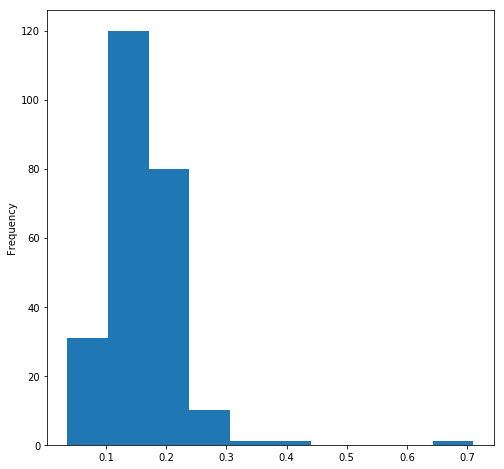

In [130]:
tips['tip_pct'].plot.hist(figsize=(8, 8))

In [133]:
grouped = tips.groupby(['day', 'smoker'])
for k, pieace in grouped:
    print(k)
    print(pieace)
    print()

('Fri', 'No')
     total_bill   tip smoker  day    time  size   tip_pct
91        22.49  3.50     No  Fri  Dinner     2  0.155625
94        22.75  3.25     No  Fri  Dinner     2  0.142857
99        12.46  1.50     No  Fri  Dinner     2  0.120385
223       15.98  3.00     No  Fri   Lunch     3  0.187735

('Fri', 'Yes')
     total_bill   tip smoker  day    time  size   tip_pct
90        28.97  3.00    Yes  Fri  Dinner     2  0.103555
92         5.75  1.00    Yes  Fri  Dinner     2  0.173913
93        16.32  4.30    Yes  Fri  Dinner     2  0.263480
95        40.17  4.73    Yes  Fri  Dinner     4  0.117750
96        27.28  4.00    Yes  Fri  Dinner     2  0.146628
97        12.03  1.50    Yes  Fri  Dinner     2  0.124688
98        21.01  3.00    Yes  Fri  Dinner     2  0.142789
100       11.35  2.50    Yes  Fri  Dinner     2  0.220264
101       15.38  3.00    Yes  Fri  Dinner     2  0.195059
220       12.16  2.20    Yes  Fri   Lunch     2  0.180921
221       13.42  3.48    Yes  Fri   Lunch 

**利用元组为列定义名称**

In [138]:
func = lambda x: x.max() -x.min()
grouped_pct = grouped['tip_pct']
grouped_pct.agg(['mean', 'std', ('range', func)])

mean       std     range
day  smoker                              
Fri  No      0.151650  0.028123  0.067349
     Yes     0.174783  0.051293  0.159925
Sat  No      0.158048  0.039767  0.235193
     Yes     0.147906  0.061375  0.290095
Sun  No      0.160113  0.042347  0.193226
     Yes     0.187250  0.154134  0.644685
Thur No      0.160298  0.038774  0.193350
     Yes     0.163863  0.039389  0.151240

**对多列应用相同的函数**  
相当于对各列进行聚合，然后连接在一起

In [143]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [145]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

**对不同的列应用不同的函数**

In [153]:
mapping = {'size': 'sum', 'tip_pct': ['mean', 'median', 'std', 'min', 'max']}
grouped.agg(mapping)

size   tip_pct                                        
             sum      mean    median       std       min       max
day  smoker                                                       
Fri  No        9  0.151650  0.149241  0.028123  0.120385  0.187735
     Yes      31  0.174783  0.173913  0.051293  0.103555  0.263480
Sat  No      115  0.158048  0.150152  0.039767  0.056797  0.291990
     Yes     104  0.147906  0.153624  0.061375  0.035638  0.325733
Sun  No      167  0.160113  0.161665  0.042347  0.059447  0.252672
     Yes      49  0.187250  0.138122  0.154134  0.065660  0.710345
Thur No      112  0.160298  0.153492  0.038774  0.072961  0.266312
     Yes      40  0.163863  0.153846  0.039389  0.090014  0.241255

**以无索引的形式返回**  
reset_index()也能实现相同效果

In [156]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863
